## Assessing the influence of antibody reliability on mRNA-protein correlation for proteins measured using MS 

**Input:**  
- Processed antibody validation status (Source Data for Figure S1)
- mRNA-protein correlation obtained from DOI:https://doi.org/10.1016/j.crmeth.2022.100288 for studies breast cancer (BrCa (2016)), Ovarian cancer (Ovarian), Colorectal adenocarcinoma (CRC (2014)), Endometrial carcinoma (EC), clear cell Renal cell carcinoma (ccRCC), and Glioblastoma (GBM). Published supplemental Table 1.

**Output:** 
- Figure 2

#### Import Packages

In [1]:
import os
import numpy as np
import pandas as pd 
from matplotlib import pyplot as plt
import seaborn as sns
%matplotlib inline

import graphing_utils
import customized_plot
import standardised_pipeline_utils

import warnings
warnings.filterwarnings("ignore")

In [2]:
get_data_path = lambda folders, fname: os.path.normpath(os.environ['DATA_PATH']+'/'+'/'.join(folders) +'/'+ fname)
get_table_path = lambda fname: os.path.normpath('../tables/' + fname)
get_figure_path = lambda fname: os.path.normpath('../figures/' + fname)

file_mRNA_MS_correlation = get_data_path(["upadhya_ryan_2022"], "TableS1.xlsx")
file_sourceData_FigureS1 = get_table_path('SourceDataForFigureS1.csv')
file_sourceData_Figure2 = get_table_path('SourceDataForFigure2.csv')

#### Load Data 

In [3]:
antibody_status = pd.read_csv(file_sourceData_FigureS1)
antibody_status[:2]

,ProteinName,GeneName,ValidationStatus
0,1433EPSILON,YWHAE,Use with Caution
1,4EBP1,EIF4EBP1,Valid


In [4]:
mRNA_protein_MS_correlation = pd.read_excel(file_mRNA_MS_correlation, sheet_name='A. mRNA-protein correlation', index_col=0)
mRNA_protein_MS_correlation[:2]

,CRC (2014),BrCa (2016),Ovarian,Colon,ccRCC,EC,LUAD,BrCa (2020),HNSCC,GBM,NCI60,CCLE,GTEx
Gene symbol,,,,,,,,,,,,,
A1BG,0.123133,-0.093805,-0.078889,NaN,0.035573,0.324974,-0.119663,0.077242,0.065872,-0.192863,NaN,NaN,0.154523
A1CF,NaN,NaN,NaN,0.673548,0.908613,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.188605


In [5]:
combined_mRNA_MS_cor = pd.concat([mRNA_protein_MS_correlation[['BrCa (2016)', 'Ovarian', 'CRC (2014)', 
                                                               'EC', 'ccRCC', 'GBM']],
                                  antibody_status.set_index('GeneName')['ValidationStatus']], join='inner', axis=1)
combined_mRNA_MS_cor.to_csv(file_sourceData_Figure2)
print("Dimensions", combined_mRNA_MS_cor.shape)
combined_mRNA_MS_cor[:2]

Dimensions (103, 7)


,BrCa (2016),Ovarian,CRC (2014),EC,ccRCC,GBM,ValidationStatus
ANXA7,0.431853,0.52711,0.151884,0.744248,0.466821,0.790204,Valid
AR,0.686791,NaN,NaN,0.742285,NaN,NaN,Valid


In [6]:
xlab = 'Antibody validation status'; ylab = "mRNA-protein (MS) correlation"           
palette = [graphing_utils.get_color(color) for color in ['orange', 'green']]
args = [graphing_utils.additional_plot_parameters(xlab=xlab, ylab=ylab, title = 'CPTAC Breast (2016)', palette = palette), 
        graphing_utils.additional_plot_parameters(xlab=xlab, ylab=ylab, title = 'CPTAC Ovarian (2016)', palette = palette), 
        graphing_utils.additional_plot_parameters(xlab=xlab, ylab=ylab, title = 'CPTAC Colorectal (2014)', palette = palette),
        graphing_utils.additional_plot_parameters(xlab=xlab, ylab=ylab, title = 'CPTAC Endometrial (2020)', palette = palette),
        graphing_utils.additional_plot_parameters(xlab=xlab, ylab=ylab, title = 'CPTAC Kidney (2019)', palette = palette),
        graphing_utils.additional_plot_parameters(xlab=xlab, ylab=ylab, title = 'CPTAC Glioblastoma (2020)', palette = palette)]

Use with Caution v.s. Valid:Mann-Whitney-Wilcoxon test two-sided, P_val=1.31E-1 stat= 9.16E+2
Use with Caution v.s. Valid:Mann-Whitney-Wilcoxon test two-sided, P_val=6.38E-1 stat= 7.62E+2
Use with Caution v.s. Valid:Mann-Whitney-Wilcoxon test two-sided, P_val=5.09E-1 stat= 3.13E+2
Use with Caution v.s. Valid:Mann-Whitney-Wilcoxon test two-sided, P_val=2.11E-2 stat= 1.18E+3
Use with Caution v.s. Valid:Mann-Whitney-Wilcoxon test two-sided, P_val=2.08E-1 stat= 7.23E+2
Use with Caution v.s. Valid:Mann-Whitney-Wilcoxon test two-sided, P_val=2.96E-1 stat= 9.01E+2


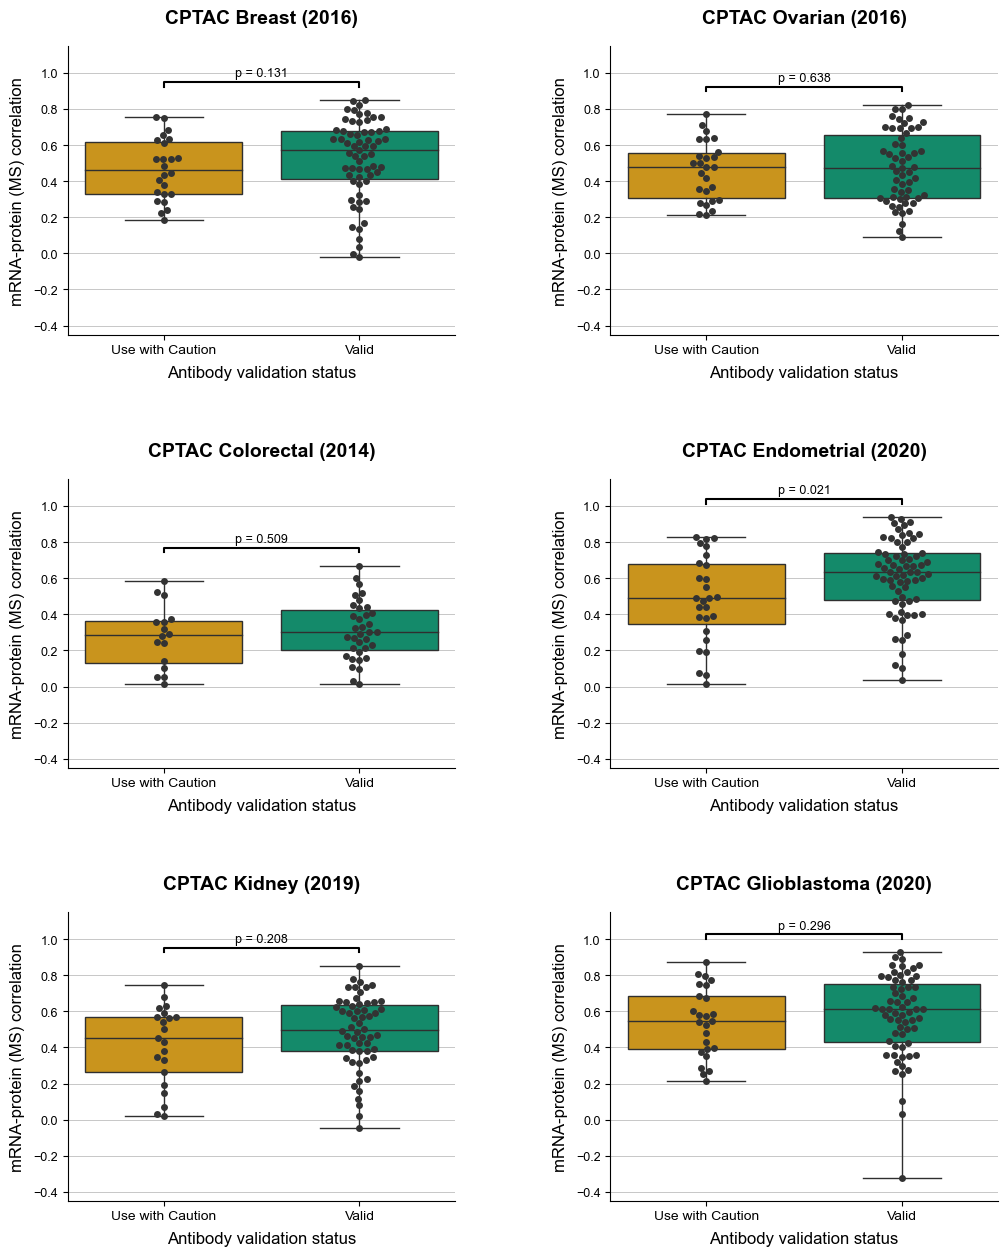

In [7]:
order=['Use with Caution', 'Valid']
with plt.rc_context({'axes.linewidth': 0.8, 'axes.labelsize':12, 'axes.spines.left': True, 'xtick.labelsize':10}):
    figure, ax = plt.subplots(3, 2, figsize=(12, 15))
    customized_plot.draw_swarmBoxPlot(combined_mRNA_MS_cor, 'BrCa (2016)', ax[0, 0], args[0], order, test='Mann-Whitney')
    customized_plot.draw_swarmBoxPlot(combined_mRNA_MS_cor, 'Ovarian', ax[0, 1], args[1], order, test='Mann-Whitney')
    customized_plot.draw_swarmBoxPlot(combined_mRNA_MS_cor, 'CRC (2014)', ax[1, 0], args[2], order, test='Mann-Whitney')
    customized_plot.draw_swarmBoxPlot(combined_mRNA_MS_cor, 'EC', ax[1, 1], args[3], order, test='Mann-Whitney')
    customized_plot.draw_swarmBoxPlot(combined_mRNA_MS_cor, 'ccRCC', ax[2, 0], args[4], order, test='Mann-Whitney')
    customized_plot.draw_swarmBoxPlot(combined_mRNA_MS_cor, 'GBM', ax[2, 1], args[5], order, test='Mann-Whitney')
    plt.subplots_adjust(wspace=0.4, hspace=0.5)
#     figure.savefig(get_figure_path('Figure2.svg'), bbox_inches='tight', dpi=300);

<div class="alert alert-block alert-success">
    mRNA-protein correlation for studies with proteomic profiles obtained from Mass spectrometry are <i>not</i> influenced by antibody validation status
</div>

Use with Caution v.s. Valid: t-test-individual two-sided with equal variance, P_val=2.61E-1 stat= 1.13E+0
Use with Caution v.s. Valid: t-test-individual two-sided with equal variance, P_val=6.71E-1 stat= 4.26E-1
Use with Caution v.s. Valid: t-test-individual two-sided with equal variance, P_val=4.90E-1 stat= 6.96E-1
Use with Caution v.s. Valid: t-test-individual two-sided with equal variance, P_val=1.33E-2 stat= 2.52E+0
Use with Caution v.s. Valid: t-test-individual two-sided with equal variance, P_val=1.81E-1 stat= 1.35E+0
Use with Caution v.s. Valid: t-test-individual two-sided with equal variance, P_val=5.22E-1 stat= 6.43E-1


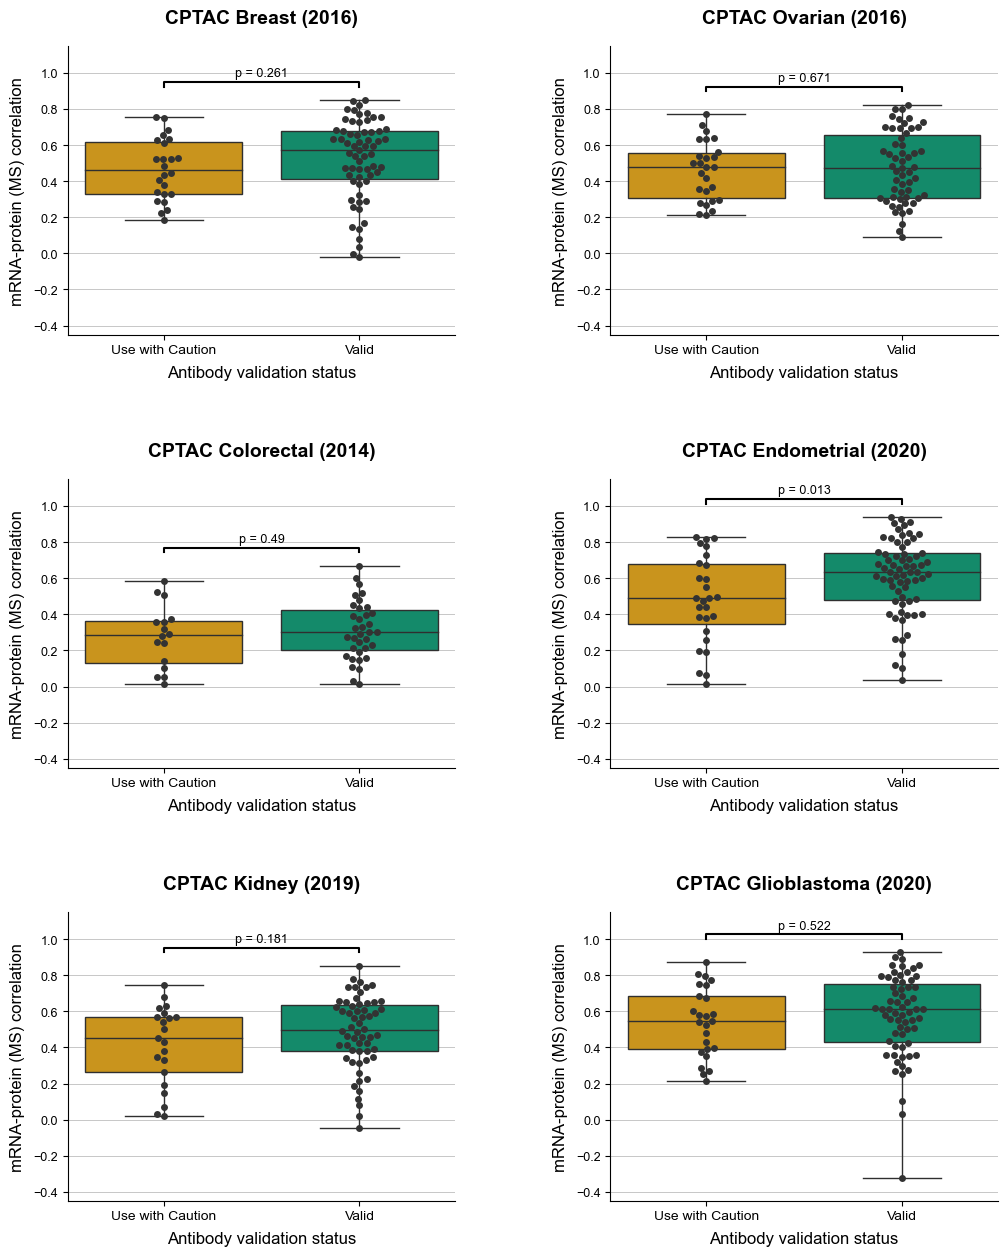

In [8]:
order=['Use with Caution', 'Valid']
with plt.rc_context({'axes.linewidth': 0.8, 'axes.labelsize':12, 'axes.spines.left': True, 'xtick.labelsize':10}):
    figure, ax = plt.subplots(3, 2, figsize=(12, 15))
    customized_plot.draw_swarmBoxPlot(combined_mRNA_MS_cor, 'BrCa (2016)', ax[0, 0], args[0], order, test='t-test_ind')
    customized_plot.draw_swarmBoxPlot(combined_mRNA_MS_cor, 'Ovarian', ax[0, 1], args[1], order, test='t-test_ind')
    customized_plot.draw_swarmBoxPlot(combined_mRNA_MS_cor, 'CRC (2014)', ax[1, 0], args[2], order, test='t-test_ind')
    customized_plot.draw_swarmBoxPlot(combined_mRNA_MS_cor, 'EC', ax[1, 1], args[3], order, test='t-test_ind')
    customized_plot.draw_swarmBoxPlot(combined_mRNA_MS_cor, 'ccRCC', ax[2, 0], args[4], order, test='t-test_ind')
    customized_plot.draw_swarmBoxPlot(combined_mRNA_MS_cor, 'GBM', ax[2, 1], args[5], order, test='t-test_ind')
    plt.subplots_adjust(wspace=0.4, hspace=0.5)
#     figure.savefig(get_figure_path('ttest/Figure2_ttest.svg'), bbox_inches='tight', dpi=300);